2. Fix mol file for the handful of molecules with 4 binds to N issues
3. Check if the active sites have shared fingerprints

In [37]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd

from IPython.display import SVG

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage, rdMolDraw2D
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms

In [2]:
m = Chem.MolFromMolFile("/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles/sf96x0_optsp_a0m2.mol") #, removeHs=False)

In [3]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))

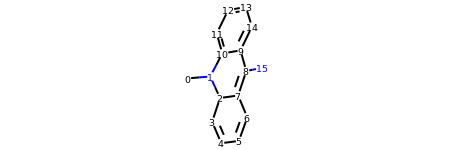

In [4]:
m

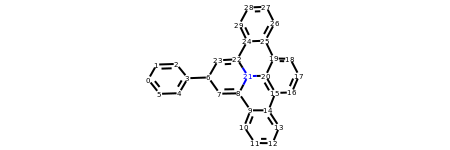

In [5]:
m = Chem.MolFromMolFile("/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles/sf245x0_optsp_a0m2.mol") #, removeHs=False)
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

In [6]:
m_conf = m.GetConformers()[0]

In [7]:
rdMolTransforms.GetDihedralDeg(m_conf, 2,1,10,11)

-150.77252426758398

In [8]:
print(rdMolDescriptors.CalcNumAromaticRings(m))
print(rdMolDescriptors.CalcNumAromaticCarbocycles(m))
print(rdMolDescriptors.CalcNumAromaticHeterocycles(m))
print(rdMolDescriptors.CalcNumAliphaticRings(m))

4
4
0
3


In [9]:
for neigh in m.GetAtoms()[1].GetNeighbors():
    print(neigh.GetIdx())

0
2


In [10]:
df = pd.read_csv("/home/nricke/work/ngcc_ml/DidItBindv5.csv", index_col=0)
df.rename(columns={"Catalyst Name":"catalyst_name"}, inplace=True)
df["Doesitbind"] = df["Doesitbind"].astype("int")
df_active = df[df["Doesitbind"] == 1]

In [11]:
moldir = "/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles-chargefix"
catalyst_mols = {}
molfile_list = os.listdir(moldir)
for molfile in molfile_list:
    mol = Chem.MolFromMolFile(os.path.join(moldir, molfile))
    print(molfile)
    
    catalyst_mols[molfile] = mol

sf224x0_optsp_a0m2.mol
sf101x0_optsp_c1m2.mol
sf249x0_optsp_a0m2.mol
sf221x0_optsp_a0m2.mol
sf152x0_optsp_a0m2.mol
sf123x0_optsp_a0m2.mol
sf245x0_optsp_a0m2.mol
sf205x0_optsp_c1m2.mol
sf117x0_optsp_a0m2.mol
sf13x1_optsp_c1m2.mol
sf227x0_optsp_a0m2.mol
sf138x0_optsp_a0m2.mol
sf135x0_optsp_a0m2.mol
sf257x0_optsp_a0m2.mol
sf186x0_optsp_a0m2.mol
sf2x0_optsp_a0m2.mol
sf281x0_optsp_a0m2.mol
sf260x0_optsp_c1m2.mol
sf25x1_optsp_a0m2.mol
sf11x0_optsp_a0m2.mol
sf24x1_optsp_a0m2.mol
sf82x0_optsp_a0m2.mol
sf106x0_optsp_a0m2.mol
sf253x0_optsp_a0m2.mol
sf159x0_optsp_a0m2.mol
sf132x0_optsp_a0m2.mol
sf184x0_optsp_a0m2.mol
sf172x0_optsp_a0m2.mol
sf209x0_optsp_c1m2.mol
sf21x2_optsp_a0m2.mol
sf171x0_optsp_a0m2.mol
sf79x0_optsp_a0m2.mol
sf244x0_optsp_a0m2.mol
sf147x0_optsp_a0m2.mol
sf99x0_optsp_a0m2.mol
sf127x0_optsp_a0m2.mol
sf31x1_optsp_a0m2.mol
sf95x0_optsp_c1m2.mol
sf139x0_optsp_a0m2.mol
sf190x0_optsp_c1m2.mol
sf201x0_optsp_a0m2.mol
sf76x0_optsp_a0m2.mol
sf43x0_optsp_a0m2.mol
sf174x0_optsp_a0m2.mol
sf

In [12]:
catalyst_mols

{'sf224x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c63ead0>,
 'sf101x0_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40d990>,
 'sf249x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40d800>,
 'sf221x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40de90>,
 'sf152x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40dcb0>,
 'sf123x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40dc60>,
 'sf245x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40d850>,
 'sf205x0_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40dad0>,
 'sf117x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40e080>,
 'sf13x1_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40e0d0>,
 'sf227x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40e580>,
 'sf138x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40e5d0>,
 'sf135x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c40e6c0>,
 'sf257x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7fe59c41f8f0>,
 'sf186x0_optsp_a0m2.

In [13]:
all_fp = {}
all_fp_set = set()
for i, mol in enumerate(catalyst_mols):
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=1, bitInfo=bi)
    fpl = list(fp.GetOnBits())
    #print(fpl)
    all_fp[molfile_list[i]] = {"fp": fpl, "bi": bi}
    all_fp_set = all_fp_set.union(set(fpl))

print()
print(all_fp_set)
print(len(all_fp_set))

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(str)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None)

In [14]:
df_mol = pd.DataFrame.from_dict(catalyst_mols, orient="index").reset_index().rename(columns={0:"mol", "index":"filename"})
df_mol = df_mol.assign(catalyst_name=df_mol.filename.str.split("_").str[0])

In [10]:
df_mol

,filename,mol,catalyst_name
0,sf224x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad34ba8a0>,sf224x0
1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209440>,sf101x0
2,sf249x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209800>,sf249x0
3,sf221x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209620>,sf221x0
4,sf152x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209670>,sf152x0
5,sf123x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209030>,sf123x0
6,sf245x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209080>,sf245x0
7,sf205x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209bc0>,sf205x0
8,sf117x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209ee0>,sf117x0
9,sf13x1_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f9ad3209f30>,sf13x1


In [31]:
df_fp = df_active.merge(df_mol.drop_duplicates(subset="catalyst_name"), on="catalyst_name", how="inner")

In [55]:
"""
calc all fingerprints centered on active sites
determine which fingerprints are most common
for the most common 5 fingerprints, take a representative molecule and display the fingerprint on that molecule
"""
fp_list, bi_list, fp_l0, fp_l1 = [], [], [], []
for index, row in df_fp.iterrows():
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(row["mol"], radius=1, fromAtoms=[row["Atom Number"]-1], bitInfo=bi)
    fp_list.append(fp)
    bi_list.append(bi)
    fp_onbits = list(fp.GetOnBits())
    print(fp_onbits)
    assert(len(fp_onbits) == 2)
    fp_l0.append(fp_onbits[0])
    fp_l1.append(fp_onbits[1])


[423, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[423, 1873]
[1260, 1873]
[1632, 1873]
[423, 1873]
[1840, 1873]
[157, 1019]
[1840, 1873]
[1840, 1873]
[503, 1019]
[1840, 1873]
[1840, 1873]
[1019, 1855]
[1840, 1873]
[1366, 1645]
[1840, 1873]
[1019, 1963]
[1840, 1873]
[547, 1873]
[547, 1873]
[1249, 1873]
[862, 1873]
[1083, 1873]
[1840, 1873]
[336, 1019]
[1840, 1873]
[336, 1019]
[1840, 1873]
[1840, 1873]
[535, 1019]
[1840, 1873]
[1840, 1873]
[1840, 1873]
[423, 1873]
[423, 1873]
[1840, 1873]
[237, 926]
[423, 1873]
[1840, 1873]
[237, 926]
[423, 1873]
[1750, 1873]
[543, 1380]
[237, 926]
[1840, 1873]
[1249, 1873]
[1840, 1873]
[237, 926]
[1840, 1873]
[237, 926]
[1750, 1873]
[1840, 1873]
[139, 926]
[1840, 1873]
[1840, 1873]
[862, 1873]
[1840, 1873]
[862, 1873]
[673, 1019]
[1366, 1645]
[1840, 1873]
[423, 1873]
[310, 1380]
[547, 1873]
[423, 1873]
[862, 1873]
[1840, 1873]
[310, 1380]
[862, 1873]
[423, 1873]
[862, 1873]
[1840, 1873]
[1093, 1

In [66]:
df_fp = df_fp.assign(fp0=fp_l0, fp1=fp_l1, bi=bi_list)

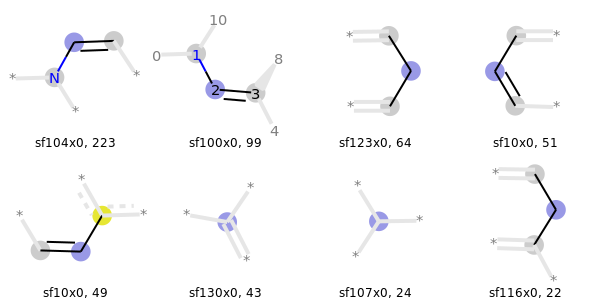

In [70]:
top8 = df_fp.fp0.value_counts().head(8)
tpls_selected = []
tpls_names = []
for fp_bit in top8.index:
    # get row from dataframe with this fingerprint
    row_top = df_fp[df_fp["fp0"] == fp_bit].iloc[0]  # any will do
    # generate display tuple
    tpls_selected.append((row_top["mol"], fp_bit, row_top["bi"]))
    # generate tuple name
    tpls_names.append(row_top["catalyst_name"]+", "+str(top8.loc[fp_bit]))
    
Draw.DrawMorganBits(tpls_selected,molsPerRow=4,legends=tpls_names)

In [33]:
m = df_fp.iloc[0].mol

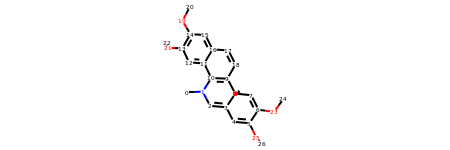

In [45]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

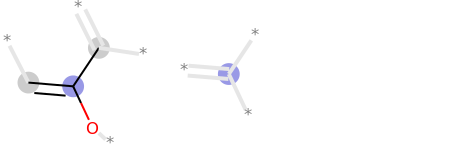

In [44]:
bi = {}
fpm = AllChem.GetMorganFingerprintAsBitVect(m, radius=1, fromAtoms=[5], bitInfo=bi)
tpls_m = [(m, x, bi) for x in fpm.GetOnBits()]
Draw.DrawMorganBits(tpls_m)

In [40]:
df_fp

,Atom Number,catalyst_name,CatalystO2File,Element,SpinDensity,ChElPGPositiveCharge,ChElPGNeutralCharge,ChargeDifference,Doesitbind,BondLength,...,AromaticExtent,RingEdge,NumNitrogens,NumHeteroatoms,ring_nitrogens,atom_plane_deviation,ring_plane_deviation,charge,filename,mol
0,3,sf100x0,sf100x0O2-2_optsp_a0m2.out,C,0.555664,-0.064043,-0.339572,-0.275529,1,1.535452,...,18,2,1,5,1,6.723311e-02,2.630862e-01,0,sf100x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913def80>
1,3,sf101x0,sf101x0O2-2_optsp_c1m2.out,C,0.142705,-0.313224,-0.387140,-0.073916,1,1.511023,...,26,2,2,2,2,9.341000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
2,12,sf101x0,sf101x0O2-11_optsp_c1m2.out,C,0.142598,-0.304842,-0.378220,-0.073378,1,1.510734,...,26,2,2,2,2,8.277000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
3,14,sf101x0,sf101x0O2-13_optsp_c1m2.out,C,0.167093,-0.259752,-0.338860,-0.079108,1,1.503761,...,26,2,2,2,2,2.866000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
4,25,sf101x0,sf101x0O2-24_optsp_c1m2.out,C,0.167076,-0.259686,-0.338835,-0.079149,1,1.511047,...,26,2,2,2,2,5.660000e-08,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
5,3,sf102x0,sf102x0O2-2_optsp_c1m2.out,C,0.210099,-0.275257,-0.383752,-0.108495,1,1.505260,...,16,2,2,2,2,1.261000e-07,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
6,8,sf102x0,sf102x0O2-7_optsp_c1m2.out,C,0.205799,-0.273892,-0.379959,-0.106067,1,1.505522,...,16,2,2,2,2,4.300000e-09,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
7,10,sf102x0,sf102x0O2-9_optsp_c1m2.out,C,0.240388,-0.230612,-0.344736,-0.114124,1,1.495640,...,16,2,2,2,2,5.321000e-07,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
8,15,sf102x0,sf102x0O2-14_optsp_c1m2.out,C,0.235954,-0.232303,-0.346221,-0.113918,1,1.505553,...,16,2,2,2,2,9.500000e-08,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
9,3,sf103x0,sf103x0O2-2_optsp_a0m2.out,C,0.133525,-0.327030,-0.488787,-0.161757,1,1.533712,...,16,2,2,2,2,2.090000e-08,2.616000e-07,0,sf103x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36914fe260>


In [39]:
#fpm = AllChem.GetMorganFingerprint(m, radius=1, fromAtoms=[10])
bi={}
fpm = AllChem.GetMorganFingerprintAsBitVect(m, radius=1, fromAtoms=[10], bitInfo=bi)
print(list(fpm.GetOnBits()))
print(bi)

[146, 1380]
{146: ((10, 1),), 1380: ((10, 0),)}


In [22]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=1, bitInfo=bi)
fpl = list(fp.GetOnBits())
fpl

[106,
 114,
 139,
 146,
 204,
 664,
 738,
 774,
 881,
 906,
 935,
 1019,
 1072,
 1364,
 1380,
 1427,
 1582,
 1652,
 1747,
 1798]

In [25]:
keyzz = pd.Series(list(catalyst_mols.keys()))
keyzz[keyzz.str.startswith("sf261")]

263    sf261x0_optsp_c1m2.mol
dtype: object

In [26]:
overp = ["sf167x0_optsp_a0m2.mol", "sf143x0_optsp_a0m2.mol", "sf135x0_optsp_a0m2.mol", "sf82x0_optsp_a0m2.mol", "sf19x1_optsp_a0m2.mol", "sf250x0_optsp_a0m2.mol"]
binde = ["sf41x0_optsp_a0m2.mol", "sf110x0_optsp_c1m2.mol", "sf218x0_optsp_a0m2.mol", "sf210x0_optsp_c1m2.mol", "sf109x0_optsp_a0m2.mol", "sf261x0_optsp_c1m2.mol", "sf168x0_optsp_a0m2.mol"]
catmol_overp = {key: catalyst_mols[key] for key in overp}
catmol_binde = {key: catalyst_mols[key] for key in binde}

In [45]:
for key in overp:
    print(Chem.MolToSmiles(catmol_overp[key]))

CC1=CC=CC2=CC3C(=CN12)c1ccccc1-c1ccccc13
CC1=CC2=CCC=CN2C=C1C
CC1=CC2C(=CN3C=CC=CC3=C2C)c2ccccc21
COc1ccc2c(c1)C=CC1=CN3C=CC=CC3=CC12
Cn1ccc2c1C=CN1C=CCC=C21
OC1=CC2=CCC=CN2c2ccccc21


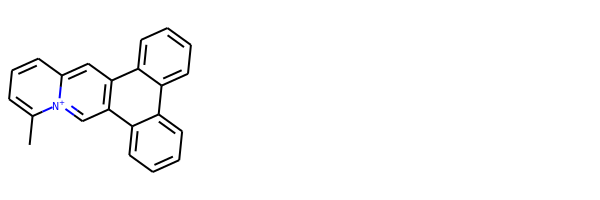

In [44]:
#m_np = Chem.MolFromSmiles('CC1=CC=CC2=CC3C(=C[N+]12)c1ccccc1-c1ccccc13')
m_np = Chem.MolFromSmiles('Cc1cccc2cc3c(c[n+]12)c1ccccc1-c1ccccc13')
Draw.MolsToGridImage([m_np])

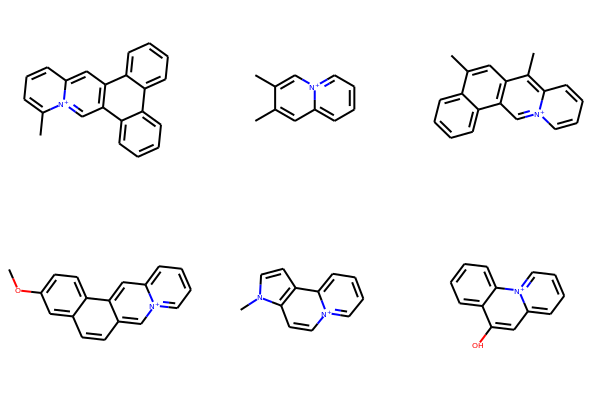

In [55]:
overp_fix = [
    "Cc1cccc2cc3c(c[n+]12)c1ccccc1-c1ccccc13",
    "Cc1cc2cccc[n+]2cc1C",
    "Cc1cc2c(c[n+]3ccccc3c2C)c2ccccc21",
    "COc1ccc2c(c1)ccc1c[n+]3ccccc3cc12",
    "Cn1ccc2c1cc[n+]1ccccc21",
    "Oc1cc2cccc[n+]2c2ccccc21",
]
overp_fix_mol = [Chem.MolFromSmiles(m_l) for m_l in overp_fix]
Draw.MolsToGridImage(overp_fix_mol)

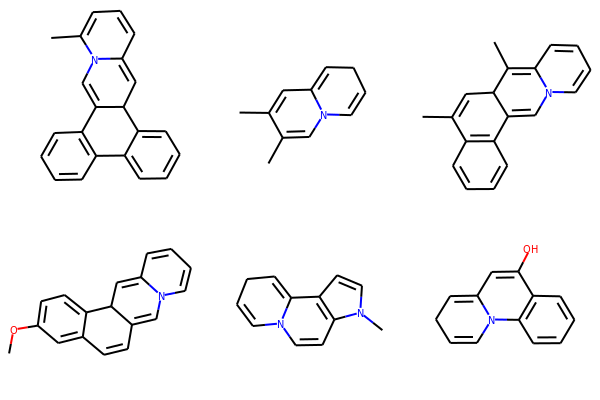

In [28]:
Draw.MolsToGridImage(list(catmol_overp.values())) #, legends=list(catmol_overp.keys()))

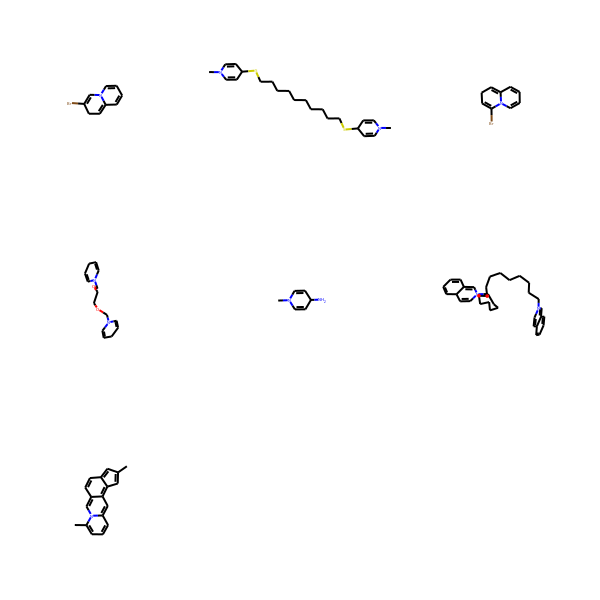

In [29]:
Draw.MolsToGridImage(list(catmol_binde.values()))

In [35]:
catmol_overp.values()

dict_values([<rdkit.Chem.rdchem.Mol object at 0x7fe59c3b53a0>, <rdkit.Chem.rdchem.Mol object at 0x7fe59c3b5710>, <rdkit.Chem.rdchem.Mol object at 0x7fe59c40e6c0>, <rdkit.Chem.rdchem.Mol object at 0x7fe59c41f9e0>, <rdkit.Chem.rdchem.Mol object at 0x7fe59c64e710>, <rdkit.Chem.rdchem.Mol object at 0x7fe59c3b5d00>])

In [62]:
df[df["catalyst_name"] == "sf167x0"][["Atom Number", "CatalystO2File", "BindingEnergy"]]

,Atom Number,CatalystO2File,BindingEnergy
1120,1,None,0.000000
1121,2,sf167x0O2-1_optsp_a0m2.out,-0.173797
1122,3,sf167x0O2-2_optsp_a0m2.out,0.177144
1123,4,sf167x0O2-3_optsp_a0m2.out,-0.148545
1124,5,sf167x0O2-4_optsp_a0m2.out,0.109116
1125,6,sf167x0O2-5_optsp_a0m2.out,0.155620
1126,8,sf167x0O2-7_optsp_a0m2.out,-0.552465
1127,9,None,0.000000
1128,10,sf167x0O2-9_optsp_a0m2.out,0.887215
1129,11,None,0.000000


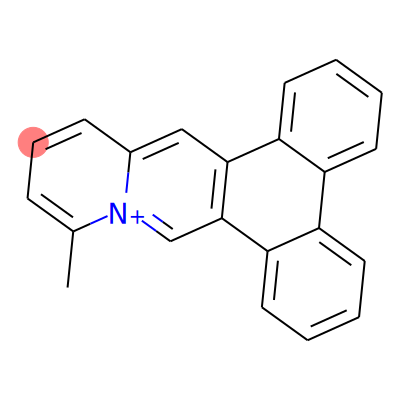

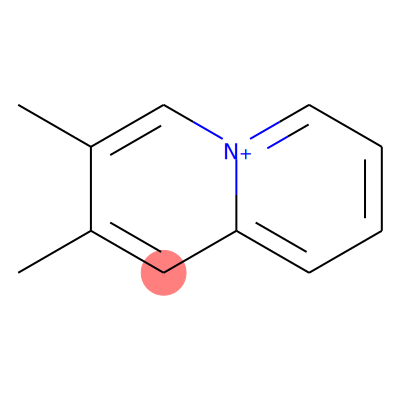

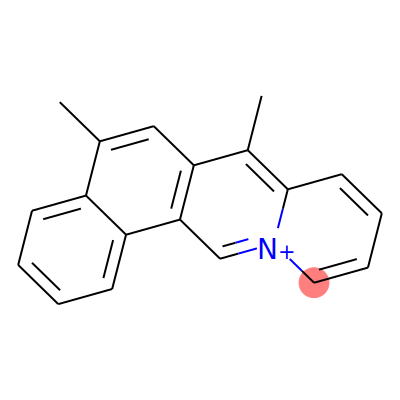

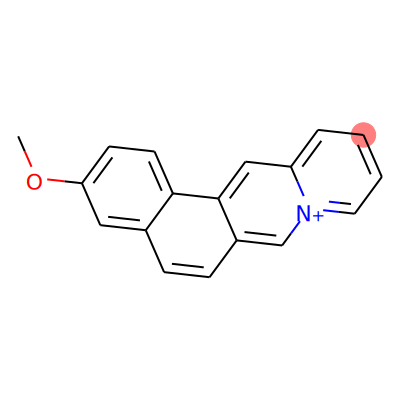

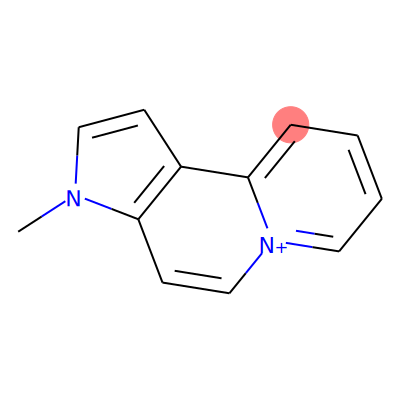

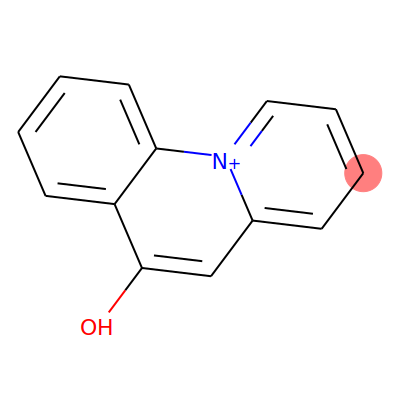

In [59]:
#hit_ats = [[4], [3], [8], [16], [13], [6]]
hit_ats = [[3], [2], [7], [15], [12], [5]]
for i,m in enumerate(overp_fix_mol):
    d = rdMolDraw2D.MolDraw2DSVG(400, 400)
    d.SetFontSize(0.75)
    rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats[i])
    d.FinishDrawing()
    svg = d.GetDrawingText()
    display(SVG(svg.replace('svg:','')))

/home/nricke/local/opt/miniconda/envs/ds/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


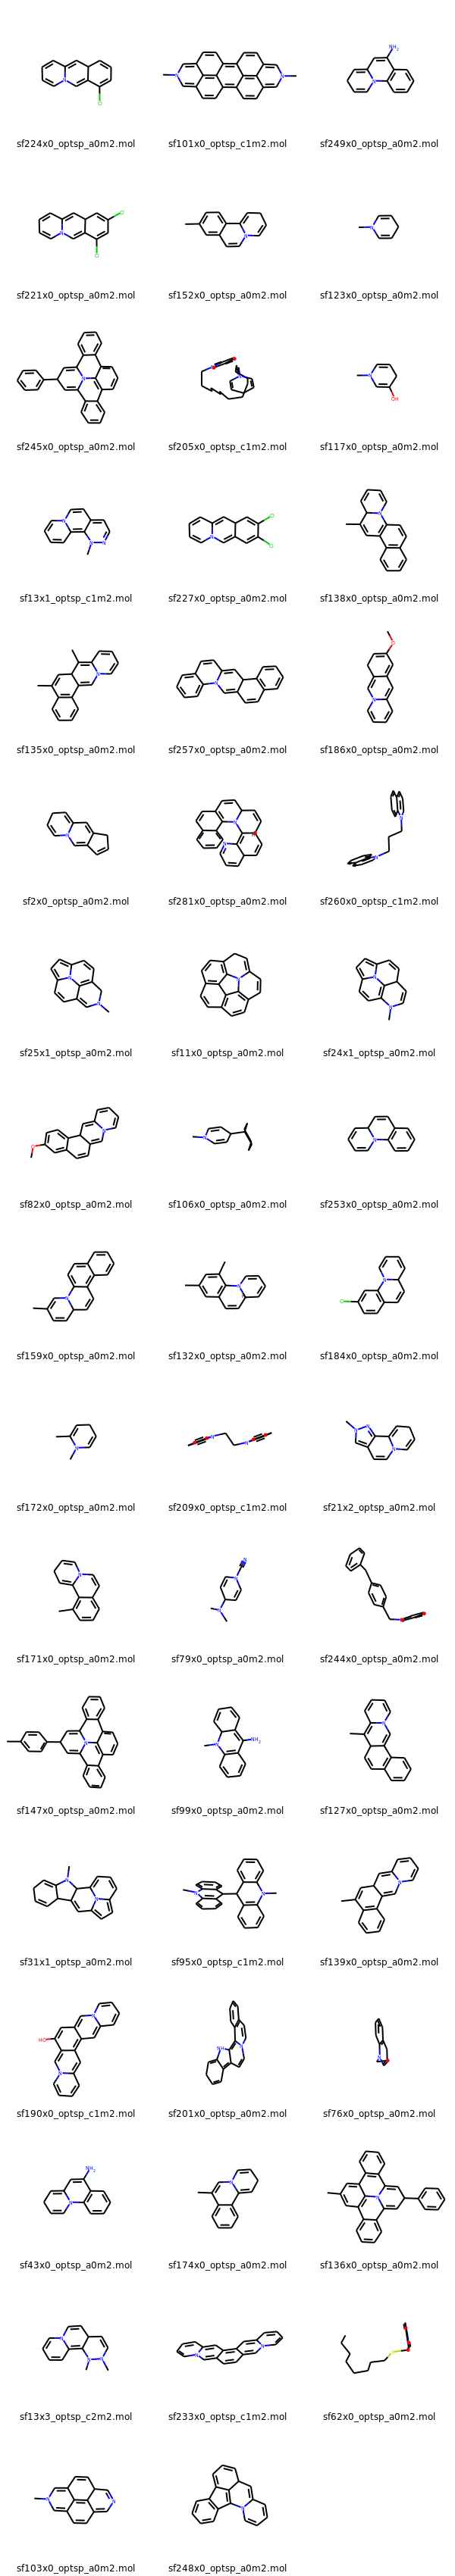

In [11]:
Draw.MolsToGridImage(list(catalyst_mols.values()), legends=list(catalyst_mols.keys()))